<a href="https://colab.research.google.com/github/saida-ssv/FMML/blob/main/%20solved%20Mod2_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 1: Basic Plots


```
Coordinator: Abhiroop Talasila
```

---

<!-- In this lab you will learn how to visualize a dataset and the various tools that can you help you do this. -->

It is often said **Data is only as good as it is presented**. Countless studies show how our brain is wired for the visual, and processes everything faster when it is through the eye. Therefore it becomes increasingly important to be able to APPRECIATE, INTERPRET and VISUALIZE data even before we start writing any form of code to process it.


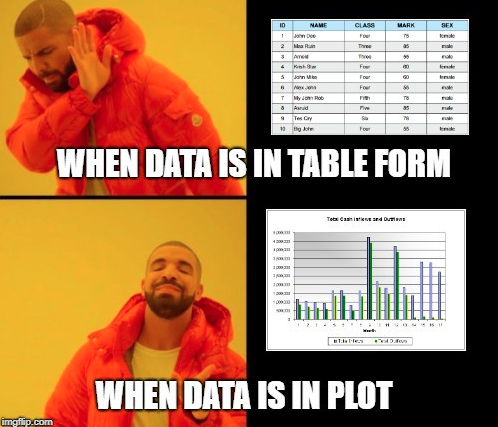

In this lab, you will learn simple ways to visualize your data using commonly-used libraries. Understanding the plots would further help in decoding the various features in the dataset and their impact on the target variables.

Data visualizations in Python can be done via many packages. We’ll be discussing first the *matplotlib* package which can be used in Python scripts, Jupyter notebook, and web application servers.

### **Matplotlib**

It is a 2-D plotting library that helps in visualizing figures. Matplotlib emulates Matlab like graphs and visualizations. Matlab is not free, is difficult to scale and as a programming language is tedious. So, matplotlib in Python is used as it is a robust, free and easy library for data visualization.

#### **Anatomy of a Matplotlib Figure**

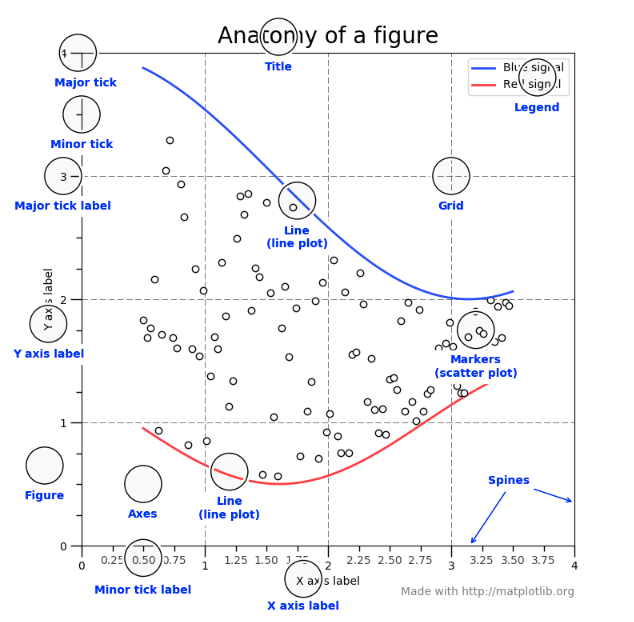

Let's start with a real dataset, the Automobile dataset from Kaggle (https://www.kaggle.com/toramky/automobile-dataset).

This dataset consists of data from 1985 Ward's Automotive Yearbook for some features relating to nearly 200 cars (e.g. the car maker, mileage, dimensions, etc.) and their prices.

In [ ]:
import requests
url = "https://raw.githubusercontent.com/SP9144/FMML_Data/main/Automobile_data.csv"
response = requests.get(url)

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from io import StringIO
import matplotlib.pyplot as plt

In [ ]:
# Loading the dataset
data = StringIO(response.text)
data = pd.read_csv(data)
print("Number of data points =", len(data))
data.head()

Number of data points = 205


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [ ]:
# Removing rows which have missing values

data.replace("?", np.nan, inplace = True)
data = data.dropna()
print(len(data))

159


In [ ]:
# Dividing the dataset into features (X) and the target variable (y)

X = data.drop("price", axis = 1)
y = pd.to_numeric(data["price"])

To begin with let's see the plot for Car making company on the X-axis and the price of the car on the Y-axis.

To do this, we use matplotlib.pyplot's scatter() function to create a Scatter Plot for the same.

As far as Machine learning/Data Science is concerned, one of the most commonly used plot for simple data visualization is scatter plots. This plot gives us a representation of where each points in the entire dataset are present with respect to any 2/3 features (columns). Scatter plots are available in 2-D as well as 3D . The 2-D scatter plot is the important/common one, where we will primarily find patterns/clusters and separability of the data. The code snippet for using a scatter plot is as shown below.

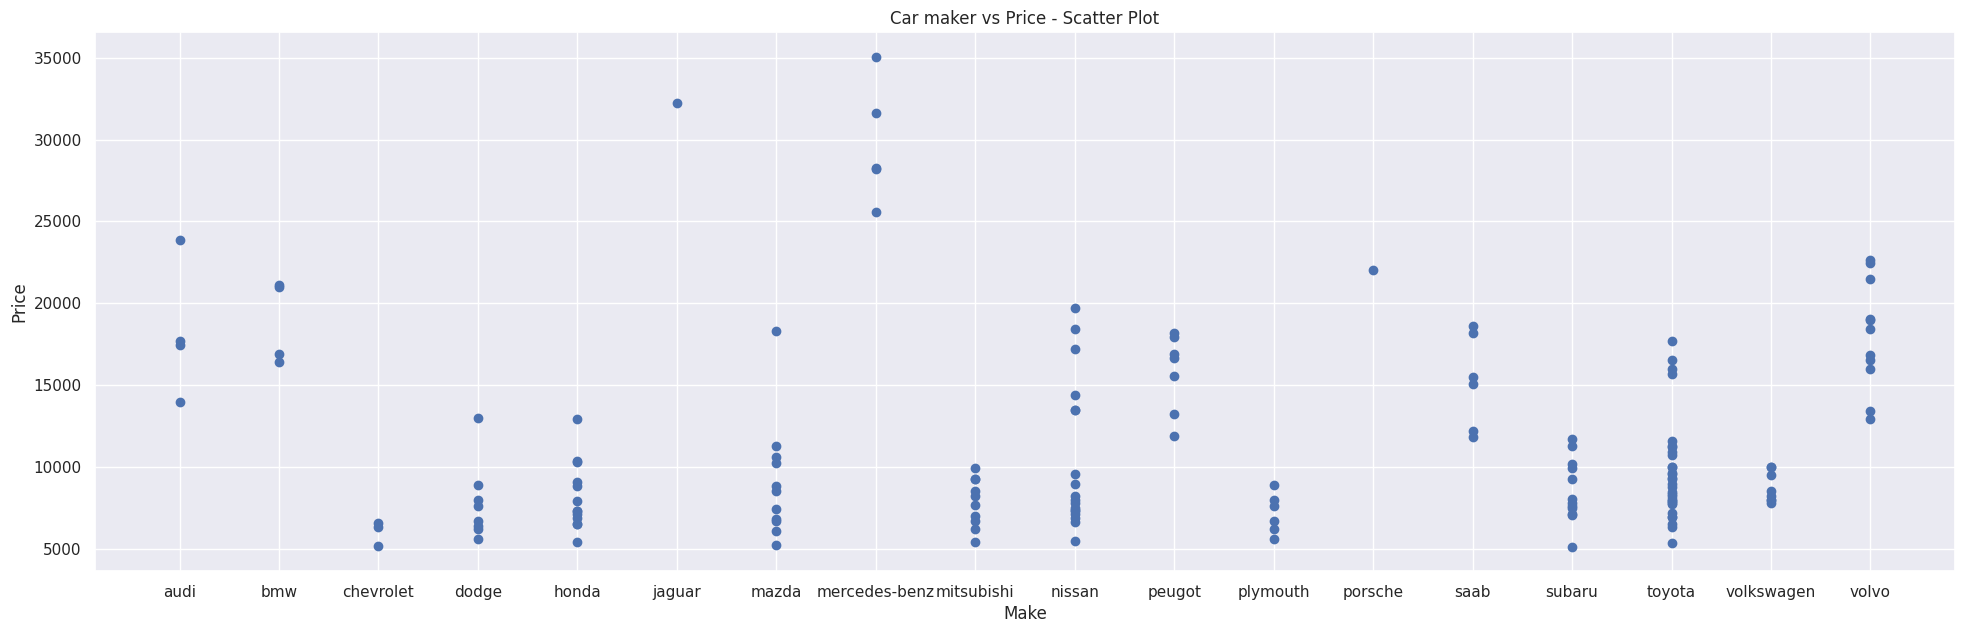

In [ ]:
plt.figure(figsize = (24, 7))
plt.scatter(X["make"], y)
plt.xlabel('Make')
plt.ylabel('Price')
plt.title('Car maker vs Price - Scatter Plot')
plt.show()

Even though the scatter plot clearly shows that some car makers like Mercedes-benz, Jaguar, Porsche and BMW keep their cars on the higher side of the price range. But is there a better way to understand the distribution of cars within these companies as well?

To do this, we will use the Seaborn package. Seaborn is a Python data visualization library based on matplotlib.

We will be creating a Box Plot. This is the type of plot that can be used to obtain more of the statistical details about the data. The straight lines at the maximum and minimum are also called as whiskers. Points outside of whiskers will be inferred as an outliers. The box plot gives us a representation of 25th, 50th ,75th quartiles. From a box plot we can also see the Interquartile range(IQR) where maximum details of the data will be present. It also gives us a clear overview of outlier points in the data.

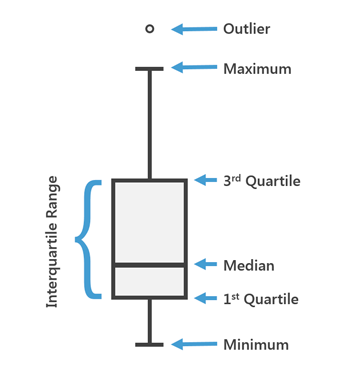

Text(0.5, 1.0, 'Car Manufacturer vs Price - Box Plot')

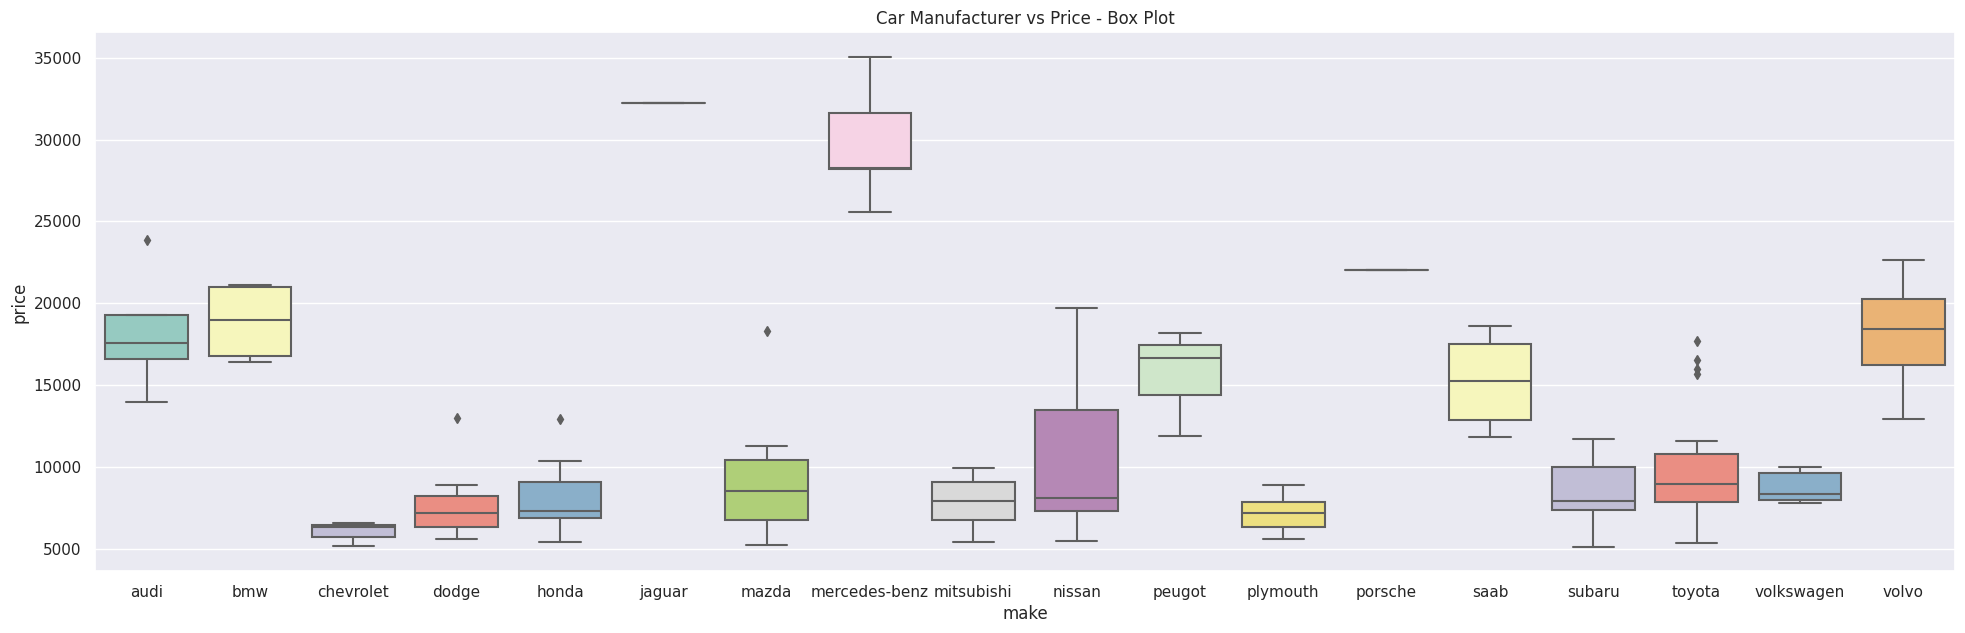

In [ ]:
sns.set(rc={'figure.figsize':(24,7)})
sns.boxplot(x=X["make"],y=y, palette="Set3").set_title('Car Manufacturer vs Price - Box Plot')

It becomes evidently clear that Mercedes-Benz, Jaguar and Porsche have the costliest cars. BMW too has costly cars but the large interquartile range suggests that the company has a broader range of cars in the market. The outliers are also important as for example, Mazda has a car listed much higher than its normal price range.

All of these conclusions could be very hard to get to using the data in a tabular format, whereas it became evidently clear straight away once we used Visualization techniques to understand the dataset.

You can also use a Violin Plot to understand the distribution within each car maker in a better way. These violin plots can be inferred as a combination of Box plot at the middle and distribution plots (Kernel Density Estimation) on both side of the data. This can give us the details of distribution like whether the distribution is mutimodal, its skewness etc. It also give us useful information like the 95% confidence interval. The below image can help us grasp some important parts from a violin plot.


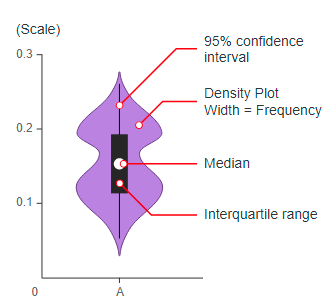

Text(0.5, 1.0, 'Car maker vs Price - Violin Plot')

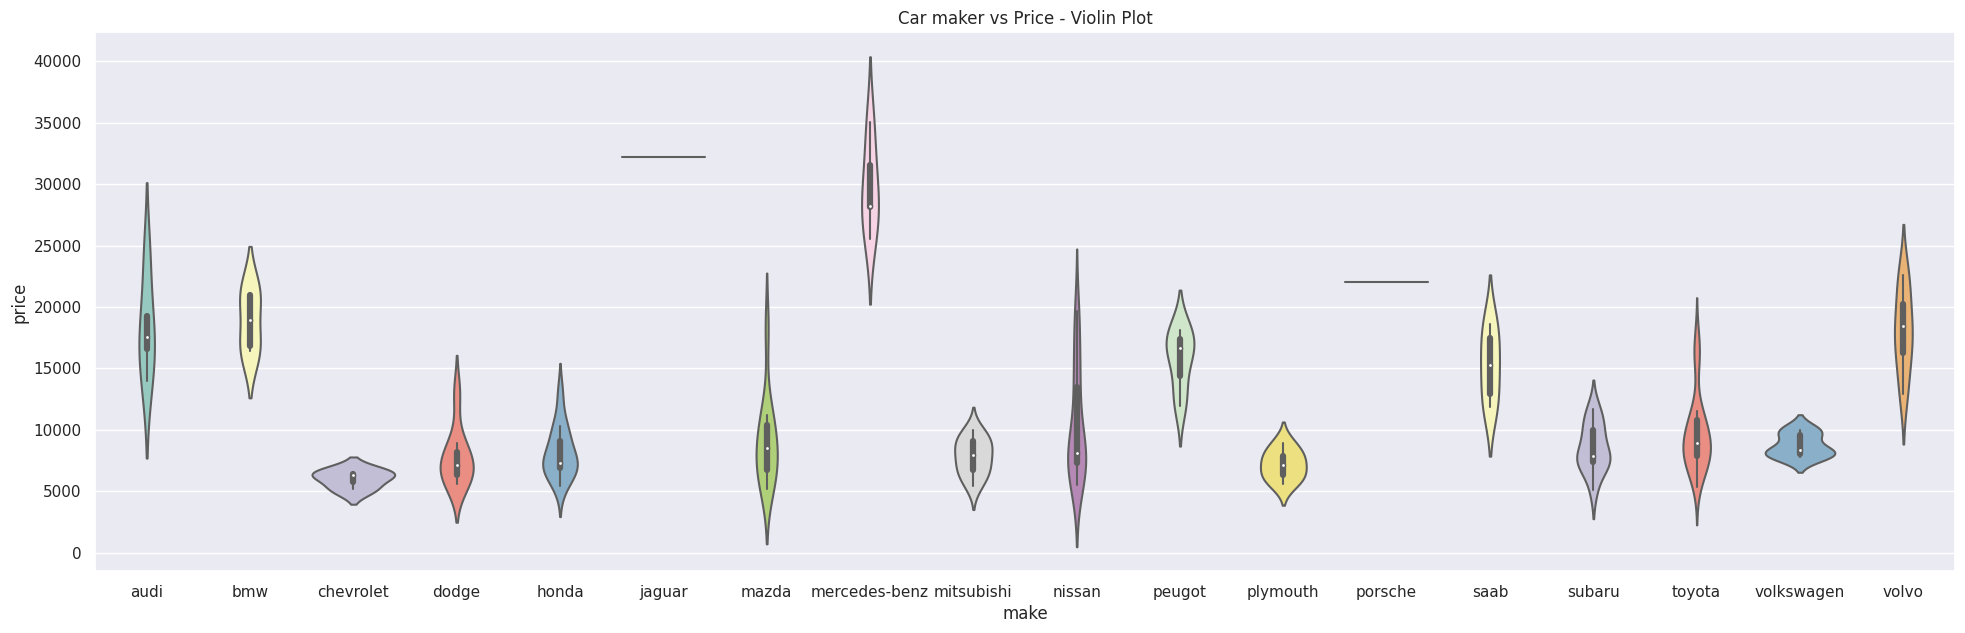

In [ ]:
sns.violinplot(x=X["make"],y=y, palette="Set3").set_title('Car maker vs Price - Violin Plot')

Another plot type are the Swarm Plots. They offer an alternate way of plotting the distribution of an attribute or the joint distribution of a couple of attributes. Unlike strip plots, swarm plots attempt to avoid obscuring points by calculating non-overlapping positions instead of adding random jitter. This sort of gives them appearance of a swarm of bees, or perhaps a honeycomb.

Text(0.5, 1.0, 'Car maker vs Price Swarm Plot')

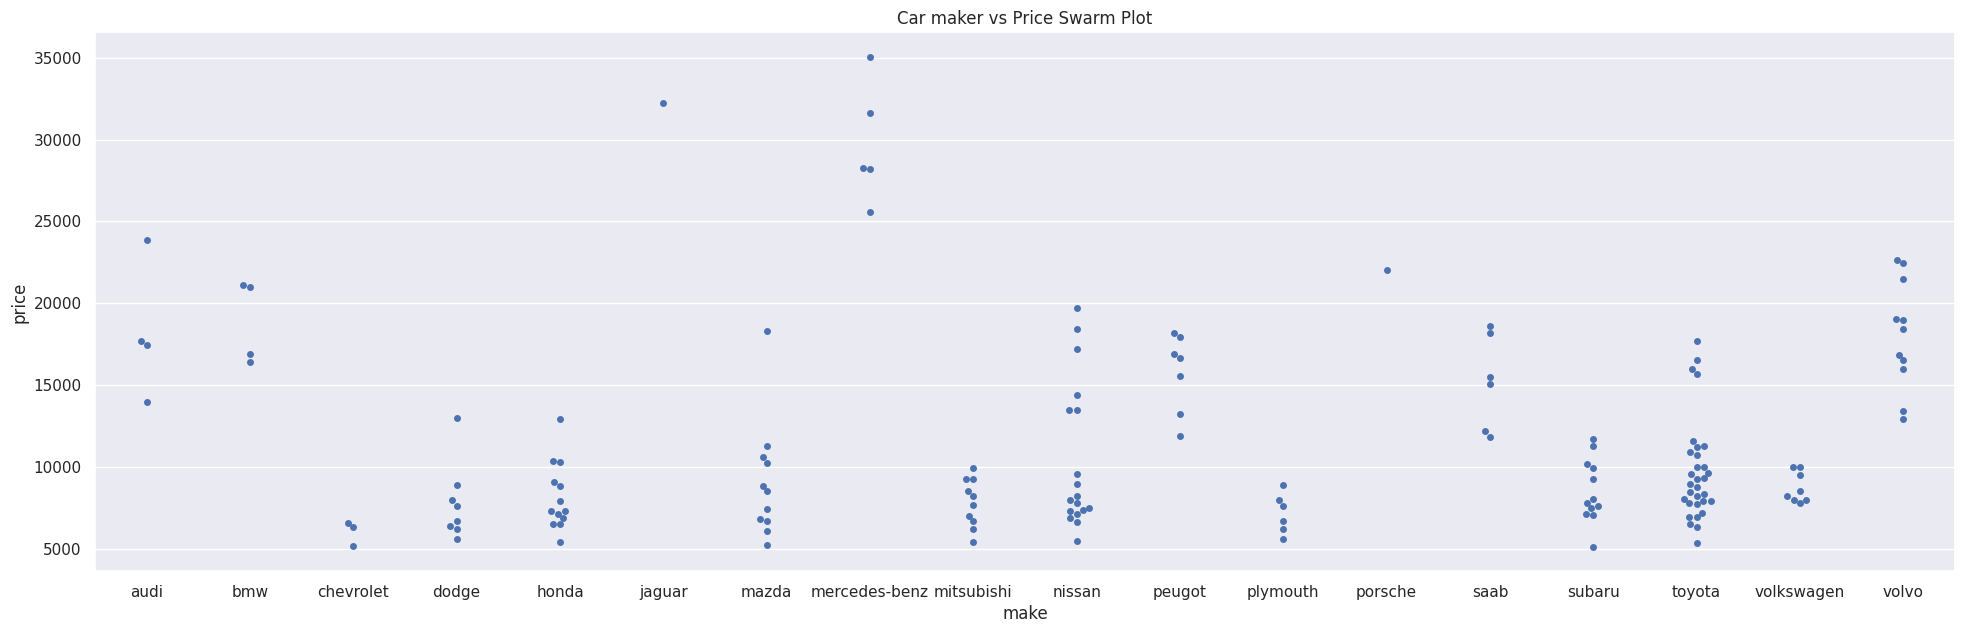

In [ ]:
sns.swarmplot(x=X["make"],y=y).set_title('Car maker vs Price Swarm Plot')

Now let us try to learn a bit more about the various features in our dataset. One of the features is Horsepower, used to describe the power that an engine is capable of producing. A sensible assumption could be that Sport car companies like Porsche would have more cars with higher horsepowers. Lets check if this is actually true ...

Text(0.5, 1.0, 'Car maker vs Horsepower Box Plot')

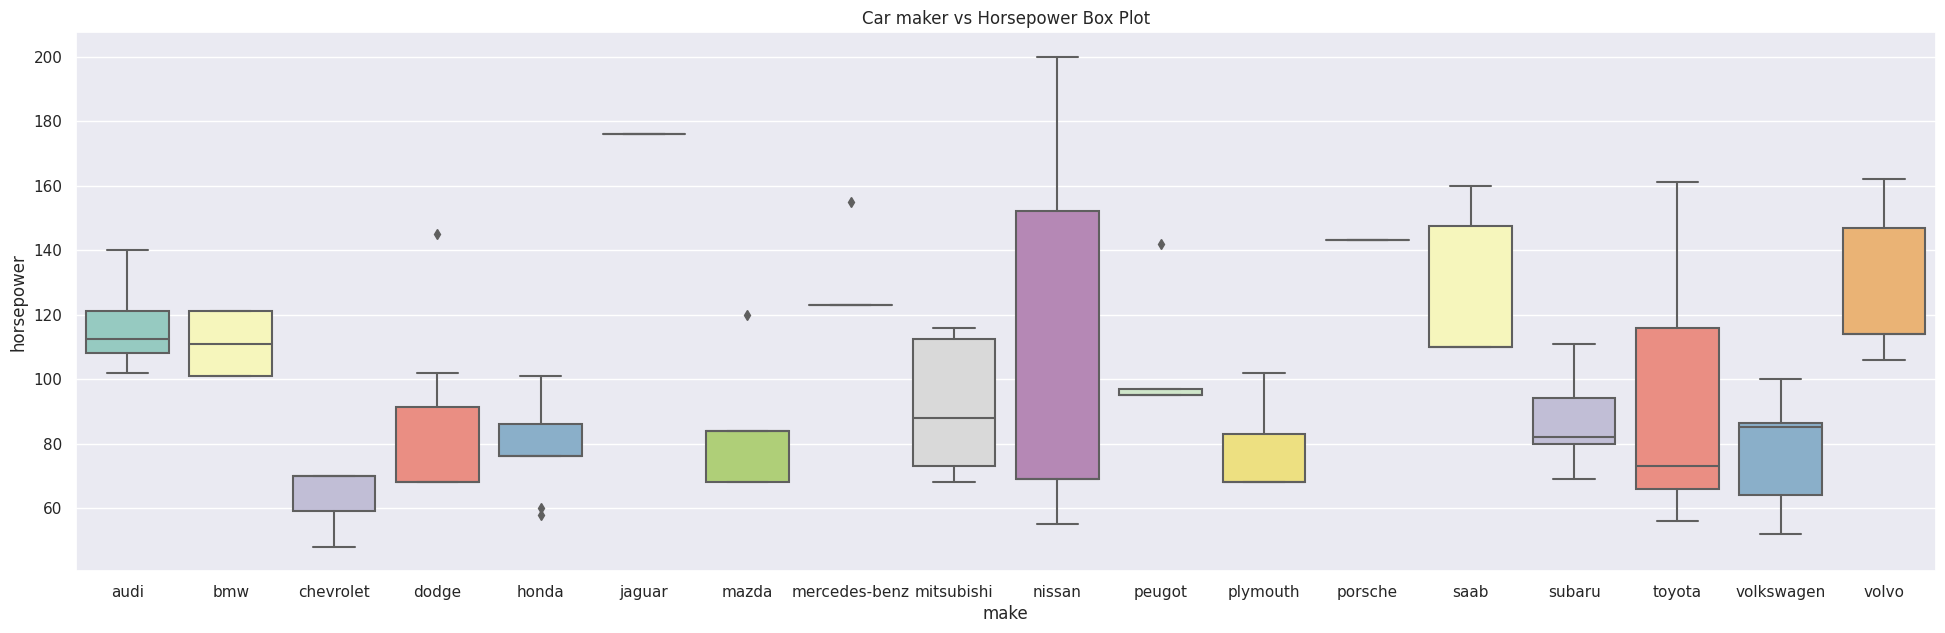

In [ ]:
sns.boxplot(x=X["make"],y=pd.to_numeric(X["horsepower"]), palette="Set3").set_title('Car maker vs Horsepower Box Plot')

As expected carmakers like Jaguar and Porsche have most of their cars with very high HP. A reasonable next step would be to see, if this new interesting feature has some correlation with our target variable "price".

A simple way to check this is to again plot a scatterplot (but this time lets do this using Seaborn instead of Matplotlib).

An expected positive correlation should show up with most of the points lying around a line with a positive slope.

<Axes: xlabel='horsepower', ylabel='price'>

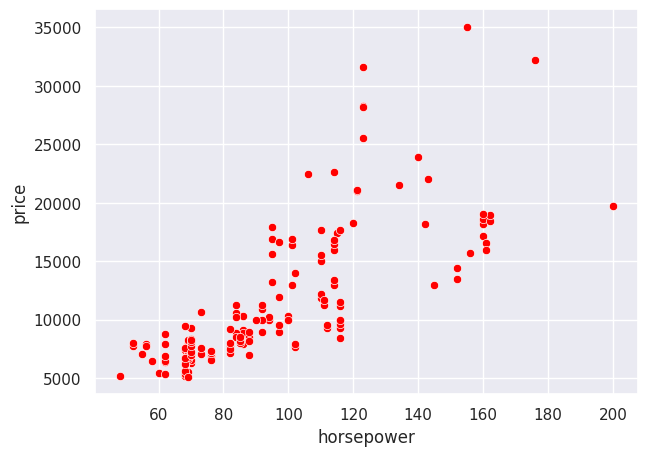

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(x=pd.to_numeric(X["horsepower"]), y = y, color = "red")

A better way of plotting these correlations is using a Jointplot instead of a simple scatter plot. The jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.

I have also used the parameter "reg" which fits a regression line through the points making the correlation sign apparent. A line with positive slope would indicate a postiive correlation and vice versa. A line parallel to x-axis would indicate no correlation between the 2 variables (implying independence).

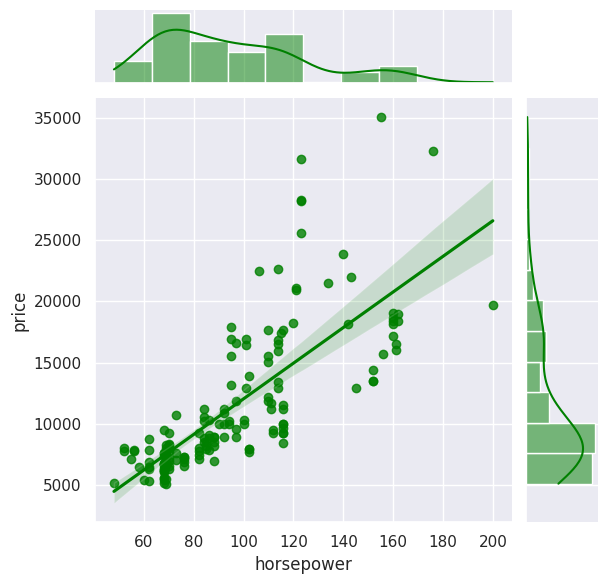

In [ ]:
sns.jointplot(x=pd.to_numeric(X["horsepower"]), y = y, kind="reg", color = 'green')

## Exercise: Plot the jointplot for a feature which has negative correlation with the target variable "price".

An example is shown below, with "highway-mpg" where MPG is miles per gallon.

### Hint: You should be using numeric features. The numeric features in the data are listed below:

'symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'

#### You are motivated to try all of these features to better understand the dataset

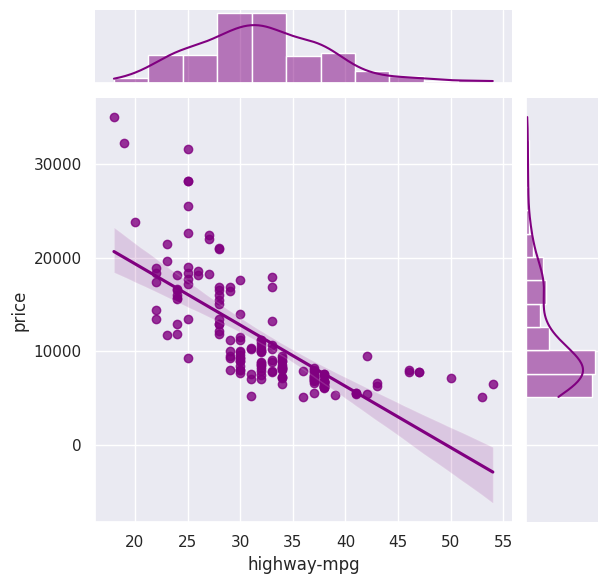

In [ ]:
############################
### CHANGE THE CODE HERE ###

feature = "highway-mpg"

############################


sns.jointplot(x=pd.to_numeric(X[feature]), y = y, kind="reg", color = 'purple')

<Axes: xlabel='symboling', ylabel='price'>

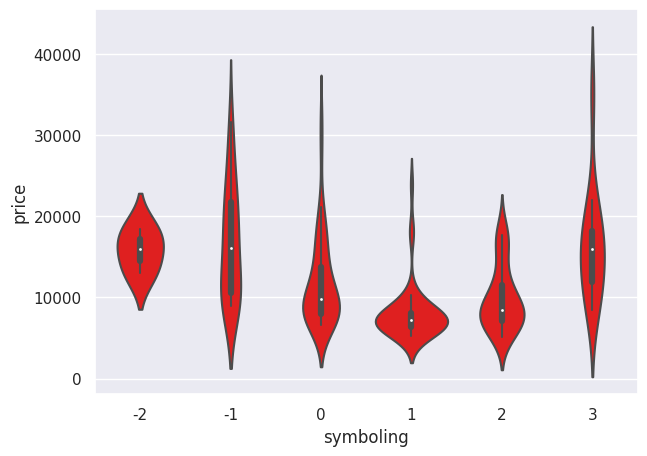

In [ ]:
sns.violinplot(x=pd.to_numeric(X["symboling"]), y = y, kind="reg", color = 'red')

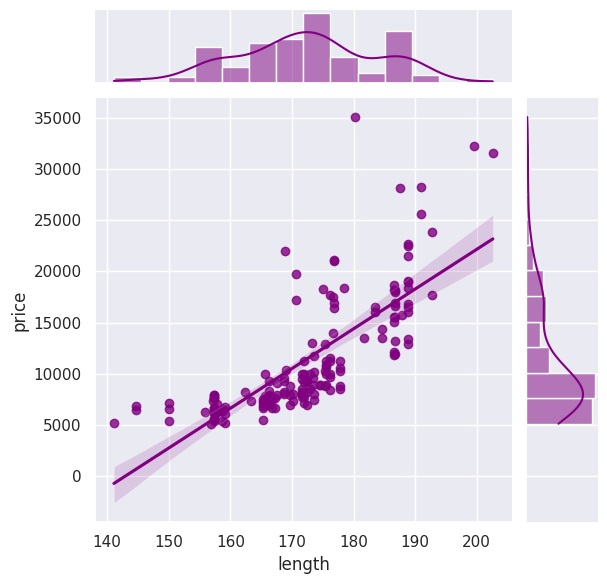

In [ ]:
sns.jointplot(x=pd.to_numeric(X["length"]), y = y, kind="reg", color = 'purple')

<Axes: xlabel='width', ylabel='price'>

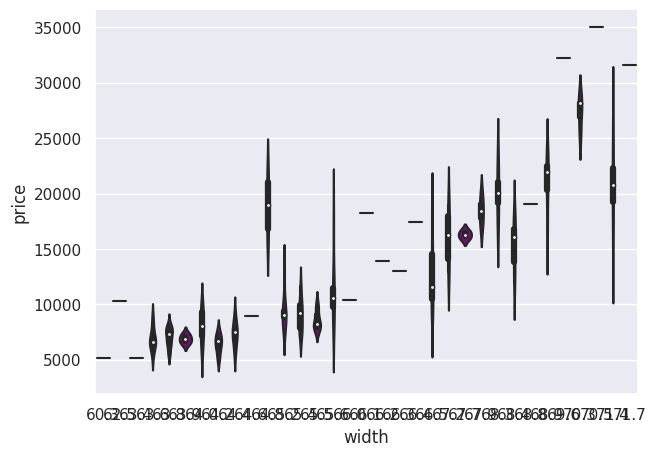

In [ ]:
sns.violinplot(x=pd.to_numeric(X["width"]), y = y, kind="reg", color = 'purple')

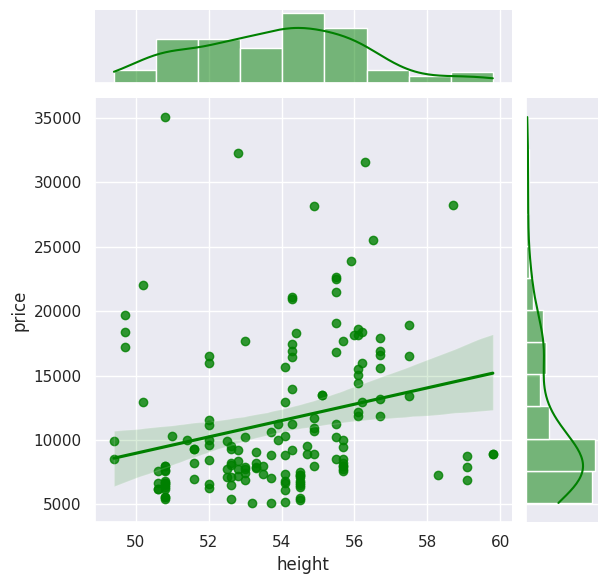

In [ ]:
sns.jointplot(x=pd.to_numeric(X["height"]), y = y, kind="reg", color = 'green')

## Question: Interpret the plot below. List all the interpretations point by point using the plot below.

Some pointers:

1) Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?

2) Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?

3) Do you think the body-style of a car can be a good predictor for its price?


# Think about the maximum/minimum values for each body-type, which body-type is the "costliest" ?

The concept of "costliest" body type can be subjective and depends on various factors such as personal preferences, market trends, and regional differences. In the context of automobiles, the cost of a vehicle can vary widely within each body type category based on factors like brand, model, features, and additional options.

Here are some common body types and factors that can affect their cost:

1. **Sedan**: Sedans are often considered more affordable compared to other body types. However, luxury sedans from premium brands can be quite expensive, with some models costing hundreds of thousands of dollars.

2. **SUV (Sport Utility Vehicle)**: SUVs come in a wide range of prices. Compact or midsize SUVs are usually more affordable, while full-size or luxury SUVs can be significantly more expensive. High-performance SUVs, like those from premium brands, can also have a high price tag.

3. **Coupe**: Coupes are often sportier and can be more expensive than their sedan counterparts, especially if they are from luxury or high-performance brands.

4. **Convertible**: Convertibles are typically more expensive than their fixed-roof counterparts due to the added complexity of the retractable roof mechanism. Luxury convertibles can be very costly.

5. **Hatchback**: Hatchbacks are generally considered more affordable, but some sportier or premium hatchback models can be on the higher end of the price spectrum.

6. **Truck**: Trucks vary widely in price based on their size, capabilities, and brand. Full-size pickup trucks, especially when equipped with advanced features and powerful engines, can be among the costliest vehicles on the market.

7. **Sports Car**: Sports cars are often associated with high costs, especially those from prestigious brands and with high-performance specifications.

8. **Electric Vehicle (EV) and Hybrid**: Electric vehicles and hybrid cars can be more expensive than their traditional counterparts due to the advanced technology and batteries used in their propulsion systems. However, government incentives and subsidies can offset some of the costs.

9. **Luxury/Exotic Cars**: Luxury and exotic cars, regardless of body type, are typically the costliest due to their premium materials, advanced technology, high-performance features, and exclusivity.

Ultimately, the "costliest" body type depends on your budget and personal preferences. Luxury and exotic cars, as well as large luxury SUVs, tend to have the highest price tags on average. However, within each body type, you can find a wide range of prices, so it's essential to consider specific models and features when determining the costliest option for your needs and desires.

# Do you think maximum/minimum values are a clear indication of which body-type is costliest, or does the interpretation improve by also taking the interquartile range into consideration?

Maximum and minimum values alone do not provide a complete or nuanced understanding of the costliness of a particular body type when it comes to vehicles. While they give you an idea of the absolute highest and lowest prices within a body type category, they may not reflect the typical or average cost.

To get a better understanding of the costliness of a body type, it's essential to consider additional statistical measures, including the interquartile range (IQR). The IQR provides insight into the spread of prices within a category while excluding extreme outliers. Here's how the interpretation can improve by considering the IQR:

1. **Maximum Value**: The maximum value represents the highest price within a body type category. While this is informative, it might be influenced by rare, high-end models or customizations.

2. **Minimum Value**: The minimum value represents the lowest price within a body type category. However, very low prices may be associated with base models or older vehicles.

3. **Interquartile Range (IQR)**: The IQR is the range between the 25th percentile (Q1) and the 75th percentile (Q3) of prices within a category. It gives you a sense of where the majority of prices fall. A wider IQR suggests greater variability in prices, while a narrower IQR indicates more consistency.

4. **Median (Q2)**: The median price is the middle value when all prices within a category are arranged in ascending order. It provides a measure of central tendency and helps identify the typical price point.

By considering both the maximum/minimum values and the IQR, you can have a more comprehensive understanding of the cost distribution within a body type. This allows you to distinguish between outliers and typical price ranges. For example, a body type with a high maximum value but a narrow IQR might have only a few exceptionally expensive models, while the majority are more reasonably priced.

In summary, while maximum and minimum values provide some information about the costliness of a body type, interpreting these values in conjunction with the interquartile range can offer a more balanced and informative perspective on the typical price range and overall cost distribution within that body type.

# Do you think the body-style of a car can be a good predictor for its price?

The body style of a car can be a useful predictor of its price to some extent, but it is not the sole or most accurate determinant of a vehicle's price. Several factors influence the cost of a car, and while body style is one of them, it is often intertwined with other considerations. Here are some factors to keep in mind:

1. **Brand and Model**: The brand and specific model of a car have a significant impact on its price. Different automakers offer vehicles with varying levels of luxury, features, and performance. Even within the same body style, prices can vary widely based on the brand and model.

2. **Trim Level and Options**: Most cars come in multiple trim levels, each offering different features and levels of luxury. Additional options and packages can also significantly affect the price. For example, a base model sedan may be more affordable than a fully loaded version of the same sedan.

3. **Size and Segment**: Within a given body style, the size and segment of the car can influence its price. For example, in the SUV category, compact SUVs are generally more affordable than midsize or full-size SUVs.

4. **Performance**: Sports cars and high-performance variants within a body style tend to be more expensive due to their specialized engines, suspensions, and other performance enhancements.

5. **Technology and Safety Features**: Advanced technology and safety features can add to the cost of a car. Luxury cars often come with the latest tech, while budget-friendly models may have fewer high-end features.

6. **Fuel Type**: The type of fuel a car uses, such as gasoline, diesel, hybrid, or electric, can impact its price. Electric and hybrid vehicles, for instance, may cost more due to their advanced propulsion systems.

7. **Market Demand**: Market conditions, including supply and demand, can have a substantial influence on a vehicle's price. Popular body styles and models may command higher prices during periods of high demand.

8. **Age and Condition**: Used cars of the same body style can vary widely in price based on factors like age, mileage, and overall condition.

9. **Geographical Location**: Prices can vary by region and country due to factors like taxes, import/export tariffs, and local market conditions.

While body style does provide a general indication of a vehicle's form and function, it's just one of many factors to consider when predicting a car's price. To get an accurate estimate of a specific car's price, you need to consider its brand, model, trim level, options, and the current market conditions in your area. Additionally, factors like resale value, maintenance costs, and insurance rates should also be taken into account when assessing the overall cost of ownership.

Text(0.5, 1.0, 'Body style vs Price Box Plot')

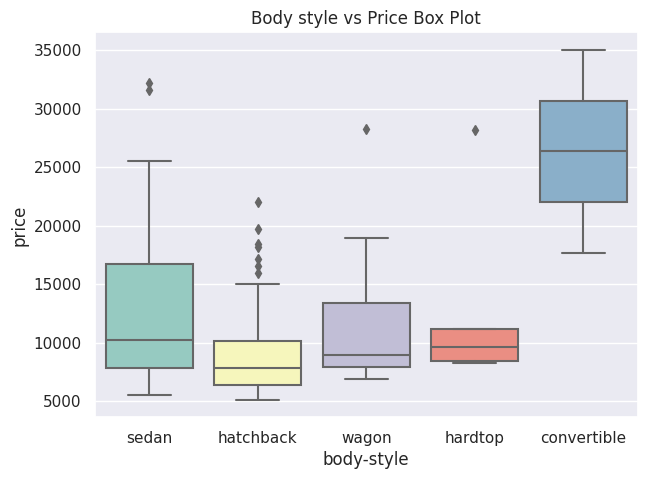

In [ ]:
sns.boxplot(x=X["body-style"],y=y, palette="Set3").set_title('Body style vs Price Box Plot')

Some interesting references:


1) https://towardsdatascience.com/data-visualization-using-matplotlib-16f1aae5ce70

2) https://towardsdatascience.com/data-visualization-for-machine-learning-and-data-science-a45178970be7


3) https://towardsdatascience.com/matplotlib-seaborn-basics-2bd7b66dbee2






